In [121]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install statsmodels

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import statsmodels.api as sm

### Load in the Dataset in your Jupyter Notebook

In [123]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [124]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

* <b>For the "Median value of owner-occupied homes" provide a boxplot</b>

[Text(0.5, 1.0, 'Boxplot on Median value of owner-occupied homes'),
 Text(0.5, 0, 'Median value of owner-occupied homes')]

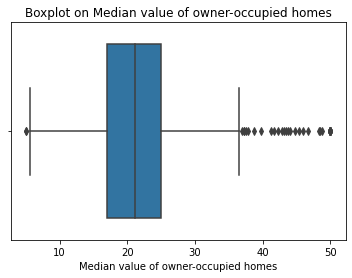

In [125]:
plot_hd = sns.boxplot(x=boston_df['MEDV'])
plot_hd.set(title = 'Boxplot on Median value of owner-occupied homes',
            xlabel = 'Median value of owner-occupied homes')

<b>Explanation</b>  
Its seen that <b>Median value of owner-occupied homes</b> has a mean of approximately 22.0

* <b>Provide a histogram for the Charles river variable</b>.

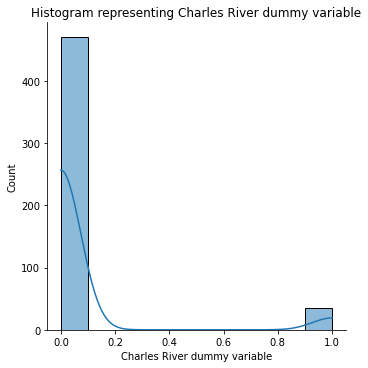

In [126]:
plot_hd = sns.displot(boston_df['CHAS'], kde=True)
plot_hd.set(title = 'Histogram representing Charles River dummy variable', xlabel = 'Charles River dummy variable', ylabel = 'Count')

<b>Explanation</b>  
The graph shows counts of houses that are adjacent to Charles River, and those that are not.

* <b>Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</b>

In [127]:
boston_df.loc[(boston_df['AGE'] <= 35),'age_group'] = "35 years and lower"
boston_df.loc[(boston_df['AGE'] > 35)&( boston_df['AGE'] < 70),'age_group'] = "between 35 and 70 years"
boston_df.loc[(boston_df['AGE'] >= 70),'age_group'] = "70 years and above"

[Text(0.5, 1.0, 'Boxplot of Median value of owner-occupied homes, across age_groups of houses')]

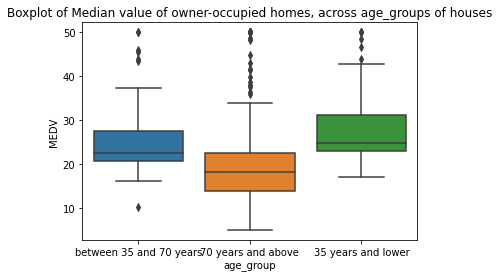

In [128]:
plot_hd = sns.boxplot(x = boston_df['age_group'], y=boston_df['MEDV'])
plot_hd.set(title = 'Boxplot of Median value of owner-occupied homes, across age_groups of houses')

<b>Explanation</b>  
The graph shows <b>Median value of owner-occupied homes</b> across 2 age_groups of homes:
* 35 years and lower
* between 35 and 70 years
* 70 years and above

* <b>Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?</b>

[Text(0.5, 1.0, 'Plot of Nitric oxides concentration against Proportion of non-retail business acres per town'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitric oxides concentration')]

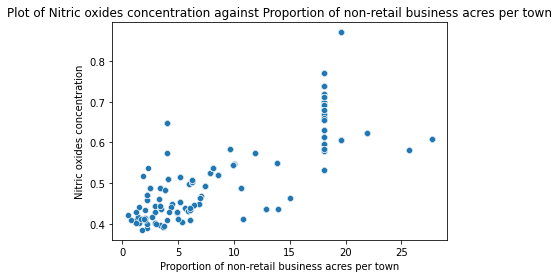

In [129]:
plot_hd = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plot_hd.set(title = 'Plot of Nitric oxides concentration against Proportion of non-retail business acres per town',
            xlabel = 'Proportion of non-retail business acres per town',
            ylabel = 'Nitric oxides concentration')

<b>Explanation</b>  
The graph shows plot of <b>Nitric oxides concentration</b> against <b>Proportion of non-retail business acres per town</b>

**What can you say about the relationship?**  
The plot implies ==> Nitric oxide concentrations are higher when the proportion of non-retail business acres per town is higher.  

* <b>Create a histogram for the pupil to teacher ratio variable</b>

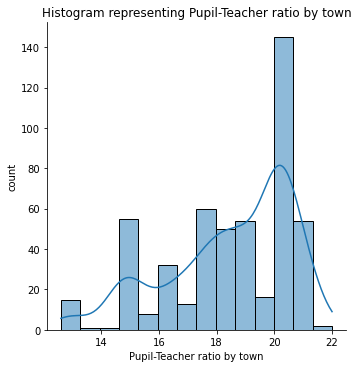

In [130]:
plot_hd = sns.displot(boston_df['PTRATIO'], kde=True)
plot_hd.set(title = 'Histogram representing Pupil-Teacher ratio by town',
           xlabel = 'Pupil-Teacher ratio by town',
           ylabel = 'count')

## Task 5: Use the appropriate tests to answer the questions provided.

* <b>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)</b>

Hypothesis:

*   $H\_0: µ\_1 = µ\_2$ ("there is no significant difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")


In [131]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

pvalue=0.003238119367639829 ==> Implies that variance across median value of houses bounded by the Charles river and those that are not, is not equal. Hence, ttest_ind will be provided with "equal_var = False".

In [132]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

<b>Conclusion:</b> Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a difference in median value of houses bounded by the Charles river.

* <b>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</b>

Current year being 2021, owner occupied units built prior to 1940 implies AGE > 81.

Hypothesis:

* $H\_0: µ\_1 = µ\_2$ ("median value of houses are equal, across the 2 samples i.e. AGE > 81 and AGE <= 81")
* $H\_1: µ\_1 ≠ µ\_2$ ("median value of houses are not equal, across the 2 samples i.e. AGE > 81 and AGE <= 81")

In [133]:
f_stats, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE'] >= 81]['MEDV'], boston_df[boston_df['AGE'] < 81]['MEDV'])
print ("f_stats: {0} -- p_val: {1}".format(f_stats, p_value))

f_stats: 68.19097395438456 -- p_val: 1.313562936560301e-15


<b>Conclusion:</b> Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a difference in median value of houses built prior to 1940 and those built after 1940.

* <b>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</b>

Hypothesis:

* $H\_0: µ\_1 = µ\_2$ ("There is no relationship between <b>Nitric oxide concentrations</b> and <b>proportion of non-retail business acres per town</b>")
* $H\_1: µ\_1 ≠ µ\_2$ ("There exists a relationship between <b>Nitric oxide concentrations</b> and <b>proportion of non-retail business acres per town</b>")

In [134]:
p_corr_coef, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print ("p_corr_coef: {0} -- p_val: {1}".format(p_corr_coef, p_value))

p_corr_coef: 0.7636514469209151 -- p_val: 7.913361061238693e-98


<b>Conclusion:</b> Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a relationship between <b>Nitric oxide concentrations</b> and <b>proportion of non-retail business acres per town</b>. Further, a p-correlation coefficient of nearly 0.76, implies a strong correlation.

* <b>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</b>

Hypothesis:

* $H\_0: $ ("<b>additional weighted distance to the five Boston employment centres</b> has no impact on the <b>median value of owner occupied homes</b>")
* $H\_1: $ ("<b>additional weighted distance to the five Boston employment centres</b> has an impact on the <b>median value of owner occupied homes</b>")

In [135]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
prediction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.21e-08
Time:                        18:04:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Conclusion:</b> Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a relationship between <b>additional weighted distance to the five Boston employment centres</b> and the <b>median value of owner occupied homes</b>. Further, a R-squared value of 0.062 implies a weak correlation coefficient of 0.248998